# <center>Handwritten digits classification using neural network</center>

In [92]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [93]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [94]:
X_train=X_train/255
X_test=X_test/255

In [95]:
len(X_test)

10000

In [96]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

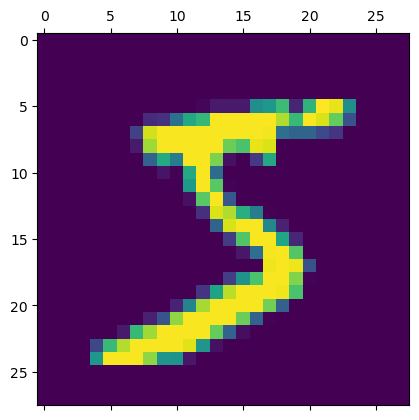

In [97]:
plt.matshow(X_train[0])

In [98]:
y_train[0]


5

In [99]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [100]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [101]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5


ValueError: Dimensions must be equal, but are 32 and 10 for '{{node compile_loss/mean_squared_error/sub}} = Sub[T=DT_FLOAT](compile_loss/mean_squared_error/Cast, sequential_10_1/dense_12_1/Sigmoid)' with input shapes: [32], [32,10].

In [ ]:
model.evaluate(X_test_flattened,y_test)

In [ ]:
model.predict(X_test_flattened)

In [ ]:
y_predicted=model.predict(X_test_flattened)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

In [ ]:
y_predicted[0]

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using the hidden layer


In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

In [ ]:

model.evaluate(X_test_flattened,y_test)


In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')